In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [41]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
#     print(X.shape)
#     print(t.shape)
    return X, t

In [42]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))
    

    ### WRITE YOUR CODE HERE - 2 MARKS
    t_1hot=[]
    for i in t_indices:
        a=[0.0]*N
        a[i]=a[i]+1
        t_1hot.append(a)
    t_1hot=np.array(t_1hot)
    return t_1hot

In [43]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
#     print(t_1hot[:,2])
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [44]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """
    
    ### WRITE YOUR CODE HERE - 2 MARKS
    Nsamples=np.size(t,0)
#     print(Nsamples)
    Nsamples_test=int(testFraction*Nsamples)
#     print(Nsamples_test)
#     np.random.seed(4)
#     n_test=np.random.randint(low=0, high=Nsamples-1, size=Nsamples_test)
    n_random=np.random.permutation(Nsamples)
    n_test=n_random[:Nsamples_test]
#     n_test.sort()
#     print(n_test)
    X_train=[]
    t_train=[]
    X_test=[]
    t_test=[]
    for i in n_random:
        if i in n_test:
            X_test.append(X[i])
            t_test.append(t[i])
        else:
            X_train.append(X[i])
            t_train.append(t[i])
#     print(X_test)
    X_train=np.array(X_train)
    X_test=np.array(X_test)
    t_test=np.array(t_test)
    t_train=np.array(t_train)
#     print(X_train)
    return X_train, t_train, X_test, t_test

In [45]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [46]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    mean=np.mean(X_train,axis=0)
    std=np.std(X_train,axis=0)
    X_train_normalized=(X_train-mean)/std
    X_test_normalized=(X_test-mean)/std
    return X_train_normalized, X_test_normalized

In [47]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [48]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    
    ### WRITE YOUR CODE HERE - 1 MARKS
    y=1/(1+np.exp(-x))

    return y

In [49]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [50]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y=np.exp(x)
    y=y/np.sum(y)
    return y

In [51]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [52]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y=x*(1-x).T

    return y

In [53]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        self.Loss=[]
        self.loss=0
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''
        self.weights1=np.random.rand(self.nh,self.ni+1)
        self.weights2=np.random.rand(self.no,self.nh+1)
        ### WRITE YOUR CODE HERE - 2 MARKS

    
    def predict(self, x):
#         x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        return v2

    def backprop(self,x,y,eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 

        ### WRITE YOUR CODE HERE - 5 MARKS
#         x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        del_weights2=(y-v2)*v1.T
        arr=(y-v2)*self.weights2
        arr=np.delete(arr,0, axis=1)
        arr=arr.sum(axis=0)
        arr=np.array([arr])
        del_weights1=np.dot((arr.T*(sigmoid(h1)*(1-sigmoid(h1)))),x.T)
        self.weights2+=eta*del_weights2
        
#         print(arr.size)
        self.weights1+=eta*del_weights1
        
        
        
        
    def fit(self, X, t, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''

        ### WRITE YOUR CODE HERE - 5 MARKS
        X = np.insert(X,0,1,axis=0)
        for j in range(0,epochs):
            self.loss=0
            for i in range(0,X.shape[1]):
                self.backprop(X[:,[i]],t[:,[i]],eta)
            for i in range(0,X.shape[1]):
                v2=self.predict(X[:,[i]])
                self.loss+=(-1*np.sum(np.log(v2)*t[:,[i]]))
            self.Loss.append(self.loss/X.shape[1])
        plt.figure(figsize=(6,6))
        plt.plot(self.Loss)
        plt.title("Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
    def predict_label(self,x):    
        '''
        Output:
            y: np array of index
        '''
        
        ### WRITE YOUR CODE HERE - 1 MARKS
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        
        return np.argmax(v2)

In [54]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    CM=np.zeros((3,3))
    for i in range(len(y)):
        CM[np.argmax(t[i]),y[i]]+=1

    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

[[11.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  8.]]
Accuracy = 100.0%


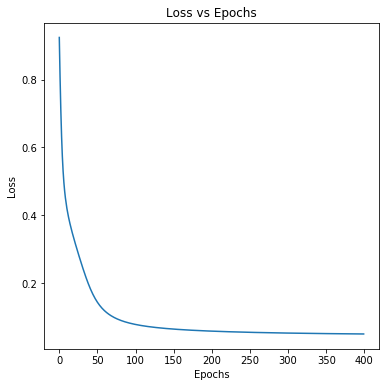

In [55]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,Y=loadIrisData()
    t=one_hot_encoding(Y,3)
    NN=NeuralNetwork(4,10,3)
    X_train, t_train, X_test, t_test=splitData(X,t,testFraction=0.2)
    X_train, X_test=normalizeX(X_train, X_test)
    X_train=X_train.T
    t_train=t_train.T
    X_test=X_test.T
    NN.init_weights()
    test=[]
    NN.fit(X_train,t_train,0.02,400)
    for i in range(0,X_test.shape[1]):
        test.append(NN.predict_label(X_test[:,[i]]))
    CM=getCM(test,t_test)
    print(CM)
    Accuracy=(CM[0,0]+CM[1,1]+CM[2,2])/X_test.shape[1]*100
    print("Accuracy = "+str(Accuracy)+"%")

    
if __name__=="__main__":
    experiment()